# Air Quality Prediction
Dataset: [Kaggle](https://www.kaggle.com/chiranjeevbit/air-quality-prediction)


In [1]:
# !pip install -q matplotlib-venn

In [2]:
# !apt-get -qq install -y libfluidsynth1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
test = pd.read_csv('./air-quality-prediction/Test.csv')
train = pd.read_csv('./air-quality-prediction/Train.csv')

In [5]:
train.isna().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

In [6]:
test.isna().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

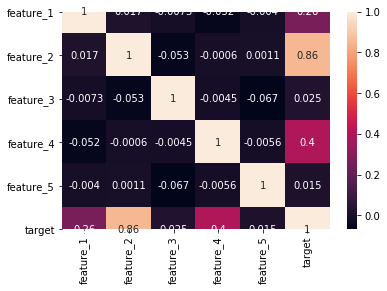

In [7]:
sns.heatmap(train.corr(),annot=True)
plt.show()

## Using sklearn

In [8]:
from sklearn import linear_model

### Fitting

In [9]:
reg = linear_model.LinearRegression()
x_train, y_train = train.drop('target',axis=1), train.target
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(reg.coef_)
print(reg.intercept_)

[29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
4.990966735574959


### Checking accuracy against test data

In [11]:
x_test, y_test = test.drop('target',axis=1), test.target
reg.score(x_test, y_test)

0.9691488404729197

### Graph between actual values and predicted values from sklearn model

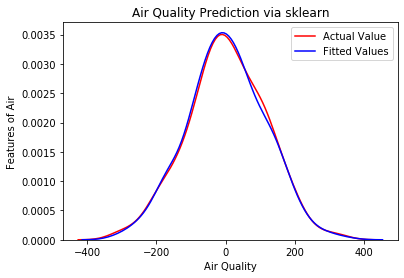

In [12]:
y_hat = reg.predict(x_test)
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values")

plt.title('Air Quality Prediction via sklearn')
plt.xlabel('Air Quality')
plt.ylabel('Features of Air')

plt.show()

## Using Python from scratch

### Creating necessary functions

In [13]:
def sse_cost(X, y, theta):
    J = sum((np.dot(X,theta) - y)**2)
    return J

In [14]:
def gradient_descent(X, y, theta, alpha, num_iters):
    n = len(y)
    J = np.zeros(num_iters)
    for i in range(num_iters):
        chng = np.dot(X, theta) - y
        theta = theta - (alpha/n)*(np.dot(chng,X))
        J[i] = sse_cost(X, y, theta)
    return theta, J

In [15]:
def linear_regression_fit(x_train, y_train):
    X = np.c_[np.ones_like(y_train), x_train]
    theta = np.random.randint(2,size=X.shape[1])
    alpha = 0.01
    num_iters = 1000
    theta_coefs, J = gradient_descent(X, y_train, theta, alpha, num_iters)
    
    plt.plot(J)
    plt.show()

    return theta_coefs

In [16]:
def linear_regression_predict(x_test, theta_coefs):
    X = np.c_[np.ones(x_test.shape[0]), x_test]
    y_hat = np.dot(X, theta_coefs)
    return y_hat

In [17]:
def r2_score(y_true, y_pred):
    '''
    Definition of R^2 score from
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
    '''
    u = ((y_true - y_pred) ** 2).sum()
    v = ((y_true - y_true.mean()) ** 2).sum()
    return (1 - u/v)

### Fitting

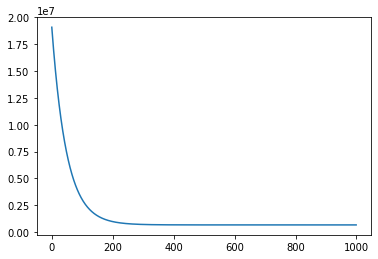

In [18]:
x_train = train.drop('target',axis=1)
y_train = train['target']
theta_coefs = linear_regression_fit(x_train, y_train)
# print(theta_coefs)

### Checking accuracy against test data

In [19]:
x_test = test.drop('target',axis=1)
y_test = np.array(test['target'])
y_hat = linear_regression_predict(x_test, theta_coefs)
r2_score(y_test, y_hat)

0.9691480687017352

### Graph between actual values and predicted values from Python model

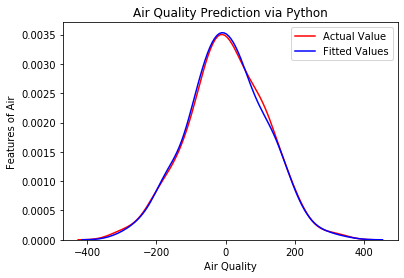

In [20]:
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values")

plt.title('Air Quality Prediction via Python')
plt.xlabel('Air Quality')
plt.ylabel('Features of Air')

plt.show()